In [1]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

In [2]:
url = r"C:\Users\Neil\Supervised Machine Learining Lab (SMLL)\Practice dataset 2 CAR DETAILS FROM CAR DEKHO.csv"
df = pd.read_csv(url)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [4]:
df.shape

(4340, 8)

In [5]:
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [6]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [7]:
for i in df.columns:
    print(f"Unique values in column '{i}' are {df[i].nunique()}")

Unique values in column 'name' are 1491
Unique values in column 'year' are 27
Unique values in column 'selling_price' are 445
Unique values in column 'km_driven' are 770
Unique values in column 'fuel' are 5
Unique values in column 'seller_type' are 3
Unique values in column 'transmission' are 2
Unique values in column 'owner' are 5


In [ ]:
# Create a mapping of unique values to numbers
name_mapping = {name: idx for idx, name in enumerate(df['name'].unique())}

# Replace the 'name' column with mapped numbers
df['name'] = df['name'].map(name_mapping)

print(df)
print("Mapping:", name_mapping)

      name  year  selling_price  km_driven    fuel seller_type transmission  \
0        0  2007          60000      70000  Petrol  Individual       Manual   
1        1  2007         135000      50000  Petrol  Individual       Manual   
2        2  2012         600000     100000  Diesel  Individual       Manual   
3        3  2017         250000      46000  Petrol  Individual       Manual   
4        4  2014         450000     141000  Diesel  Individual       Manual   
...    ...   ...            ...        ...     ...         ...          ...   
4335   180  2014         409999      80000  Diesel  Individual       Manual   
4336  1490  2014         409999      80000  Diesel  Individual       Manual   
4337   121  2009         110000      83000  Petrol  Individual       Manual   
4338   561  2016         865000      90000  Diesel  Individual       Manual   
4339    91  2016         225000      40000  Petrol  Individual       Manual   

             owner  
0      First Owner  
1      Fi

In [9]:
# Create a mapping of unique values to numbers
name_mapping = {name: idx for idx, name in enumerate(df['fuel'].unique())}

# Replace the 'name' column with mapped numbers
df['fuel'] = df['fuel'].map(name_mapping)

print(df.head())
print("Mapping:", name_mapping)

   name  year  selling_price  km_driven  fuel seller_type transmission  \
0     0  2007          60000      70000     0  Individual       Manual   
1     1  2007         135000      50000     0  Individual       Manual   
2     2  2012         600000     100000     1  Individual       Manual   
3     3  2017         250000      46000     0  Individual       Manual   
4     4  2014         450000     141000     1  Individual       Manual   

          owner  
0   First Owner  
1   First Owner  
2   First Owner  
3   First Owner  
4  Second Owner  
Mapping: {'Petrol': 0, 'Diesel': 1, 'CNG': 2, 'LPG': 3, 'Electric': 4}


In [10]:
# Create a mapping of unique values to numbers
name_mapping = {name: idx for idx, name in enumerate(df['seller_type'].unique())}

# Replace the 'name' column with mapped numbers
df['seller_type'] = df['seller_type'].map(name_mapping)

print(df.head())
print("Mapping:", name_mapping)

   name  year  selling_price  km_driven  fuel  seller_type transmission  \
0     0  2007          60000      70000     0            0       Manual   
1     1  2007         135000      50000     0            0       Manual   
2     2  2012         600000     100000     1            0       Manual   
3     3  2017         250000      46000     0            0       Manual   
4     4  2014         450000     141000     1            0       Manual   

          owner  
0   First Owner  
1   First Owner  
2   First Owner  
3   First Owner  
4  Second Owner  
Mapping: {'Individual': 0, 'Dealer': 1, 'Trustmark Dealer': 2}


In [11]:
# Create a mapping of unique values to numbers
name_mapping = {name: idx for idx, name in enumerate(df['transmission'].unique())}

# Replace the 'name' column with mapped numbers
df['transmission'] = df['transmission'].map(name_mapping)

print(df.head())
print("Mapping:", name_mapping)

   name  year  selling_price  km_driven  fuel  seller_type  transmission  \
0     0  2007          60000      70000     0            0             0   
1     1  2007         135000      50000     0            0             0   
2     2  2012         600000     100000     1            0             0   
3     3  2017         250000      46000     0            0             0   
4     4  2014         450000     141000     1            0             0   

          owner  
0   First Owner  
1   First Owner  
2   First Owner  
3   First Owner  
4  Second Owner  
Mapping: {'Manual': 0, 'Automatic': 1}


In [12]:
# Create a mapping of unique values to numbers
name_mapping = {name: idx for idx, name in enumerate(df['owner'].unique())}

# Replace the 'name' column with mapped numbers
df['owner'] = df['owner'].map(name_mapping)

print(df.head())
print("Mapping:", name_mapping)

   name  year  selling_price  km_driven  fuel  seller_type  transmission  \
0     0  2007          60000      70000     0            0             0   
1     1  2007         135000      50000     0            0             0   
2     2  2012         600000     100000     1            0             0   
3     3  2017         250000      46000     0            0             0   
4     4  2014         450000     141000     1            0             0   

   owner  
0      0  
1      0  
2      0  
3      0  
4      1  
Mapping: {'First Owner': 0, 'Second Owner': 1, 'Fourth & Above Owner': 2, 'Third Owner': 3, 'Test Drive Car': 4}


In [13]:
X = df.iloc[:,:-1]
X.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission
0,0,2007,60000,70000,0,0,0
1,1,2007,135000,50000,0,0,0
2,2,2012,600000,100000,1,0,0
3,3,2017,250000,46000,0,0,0
4,4,2014,450000,141000,1,0,0


In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = X.columns  # Add column names
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]  # Calculate VIF for all columns
vif

,features,VIF
0,name,2.638551
1,year,6.346224
2,selling_price,2.821264
3,km_driven,3.591420
4,fuel,2.337970
5,seller_type,1.433005
6,transmission,1.598363


In [15]:
y = df.iloc[:, -1]  # Select the last column as a Series
print(y.head())  # Now you can use .head()

0    0
1    0
2    0
3    0
4    1
Name: owner, dtype: int64


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
mul = LinearRegression()

In [18]:
mul.fit(X_train,y_train)

LinearRegression()

In [19]:
X_train.shape

(3472, 7)

In [20]:
y_pred = mul.predict(X_test)
print(y_pred)

[ 8.49608336e-01  1.00381976e-01  8.78391273e-01  6.32084517e-01
  4.33238314e-01  5.48762912e-01  1.08321837e-01  4.94852217e-01
  3.09473663e-01  4.38383385e-01  2.71526111e-01  4.89806294e-01
  4.06336101e-01  1.52178607e+00 -2.70372333e-01  1.88514671e-01
 -8.78380622e-02  8.05204878e-01  8.65003261e-01  4.46550608e-01
  4.11545531e-01  1.77019756e-01  1.57207101e-01  1.74257215e-01
  8.92540600e-01  4.35984790e-01  2.44561520e-01  4.95400737e-01
  2.38451950e-01  4.73541014e-02  1.13279396e+00 -4.04882350e-03
  3.84492507e-01  2.48337099e-01  7.46457008e-02  7.66838477e-01
  1.60510543e-01  1.68988186e-01  8.04865254e-01  9.51670748e-02
  4.60667558e-01  1.29784902e-01  2.39058773e-01  7.47810834e-01
  7.92499722e-01  9.26908390e-01  2.77195082e-01  6.58359298e-01
  2.50571710e-01  6.86966781e-01  1.14509157e+00  4.91667631e-01
 -1.28038432e-02  5.34498129e-01  2.28181962e-01  1.88684960e-02
  3.70287206e-01  1.25289972e+00  4.43203785e-01  1.65287798e-01
  1.03438168e+00  7.05639

In [21]:
# Actual vs Predictied value
mul_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value' : y_pred})
print(mul_diff)

      Actual value  Predicted value
3978             0         0.849608
1448             0         0.100382
2664             1         0.878391
17               1         0.632085
1634             1         0.433238
...            ...              ...
3468             3         0.972060
3164             0         0.592144
416              1         0.676340
1616             0        -0.218483
2480             0        -0.093019

[868 rows x 2 columns]


In [22]:
# Errors
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Mean Square Error
mean_square_error = mean_squared_error(y_test,y_pred)
print(f"Mean Square Error is : {mean_square_error}")
# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error is : {mae}")
# Root Mean Square Error
root_mean_square_error = np.sqrt(mean_square_error)
print(f"Root Mean Square Error is : {root_mean_square_error}")
# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R2 score is : {r2*100}")
#intecept
X_intercept = mul.intercept_
print(f"X intercept is : {X_intercept}")
Y_intercept = mul.coef_
print(f"Y intercept is : {Y_intercept}")

Mean Square Error is : 0.5906676104157311
Mean Absolute Error is : 0.5233319907697557
Root Mean Square Error is : 0.7685490292855305
R2 score is : 16.36082249497498
X intercept is : 142.88396670393624
Y intercept is : [ 5.40852592e-05 -7.07631703e-02 -2.47423880e-08  1.88231196e-06
  1.06544470e-02 -2.07665250e-01  5.56701223e-02]


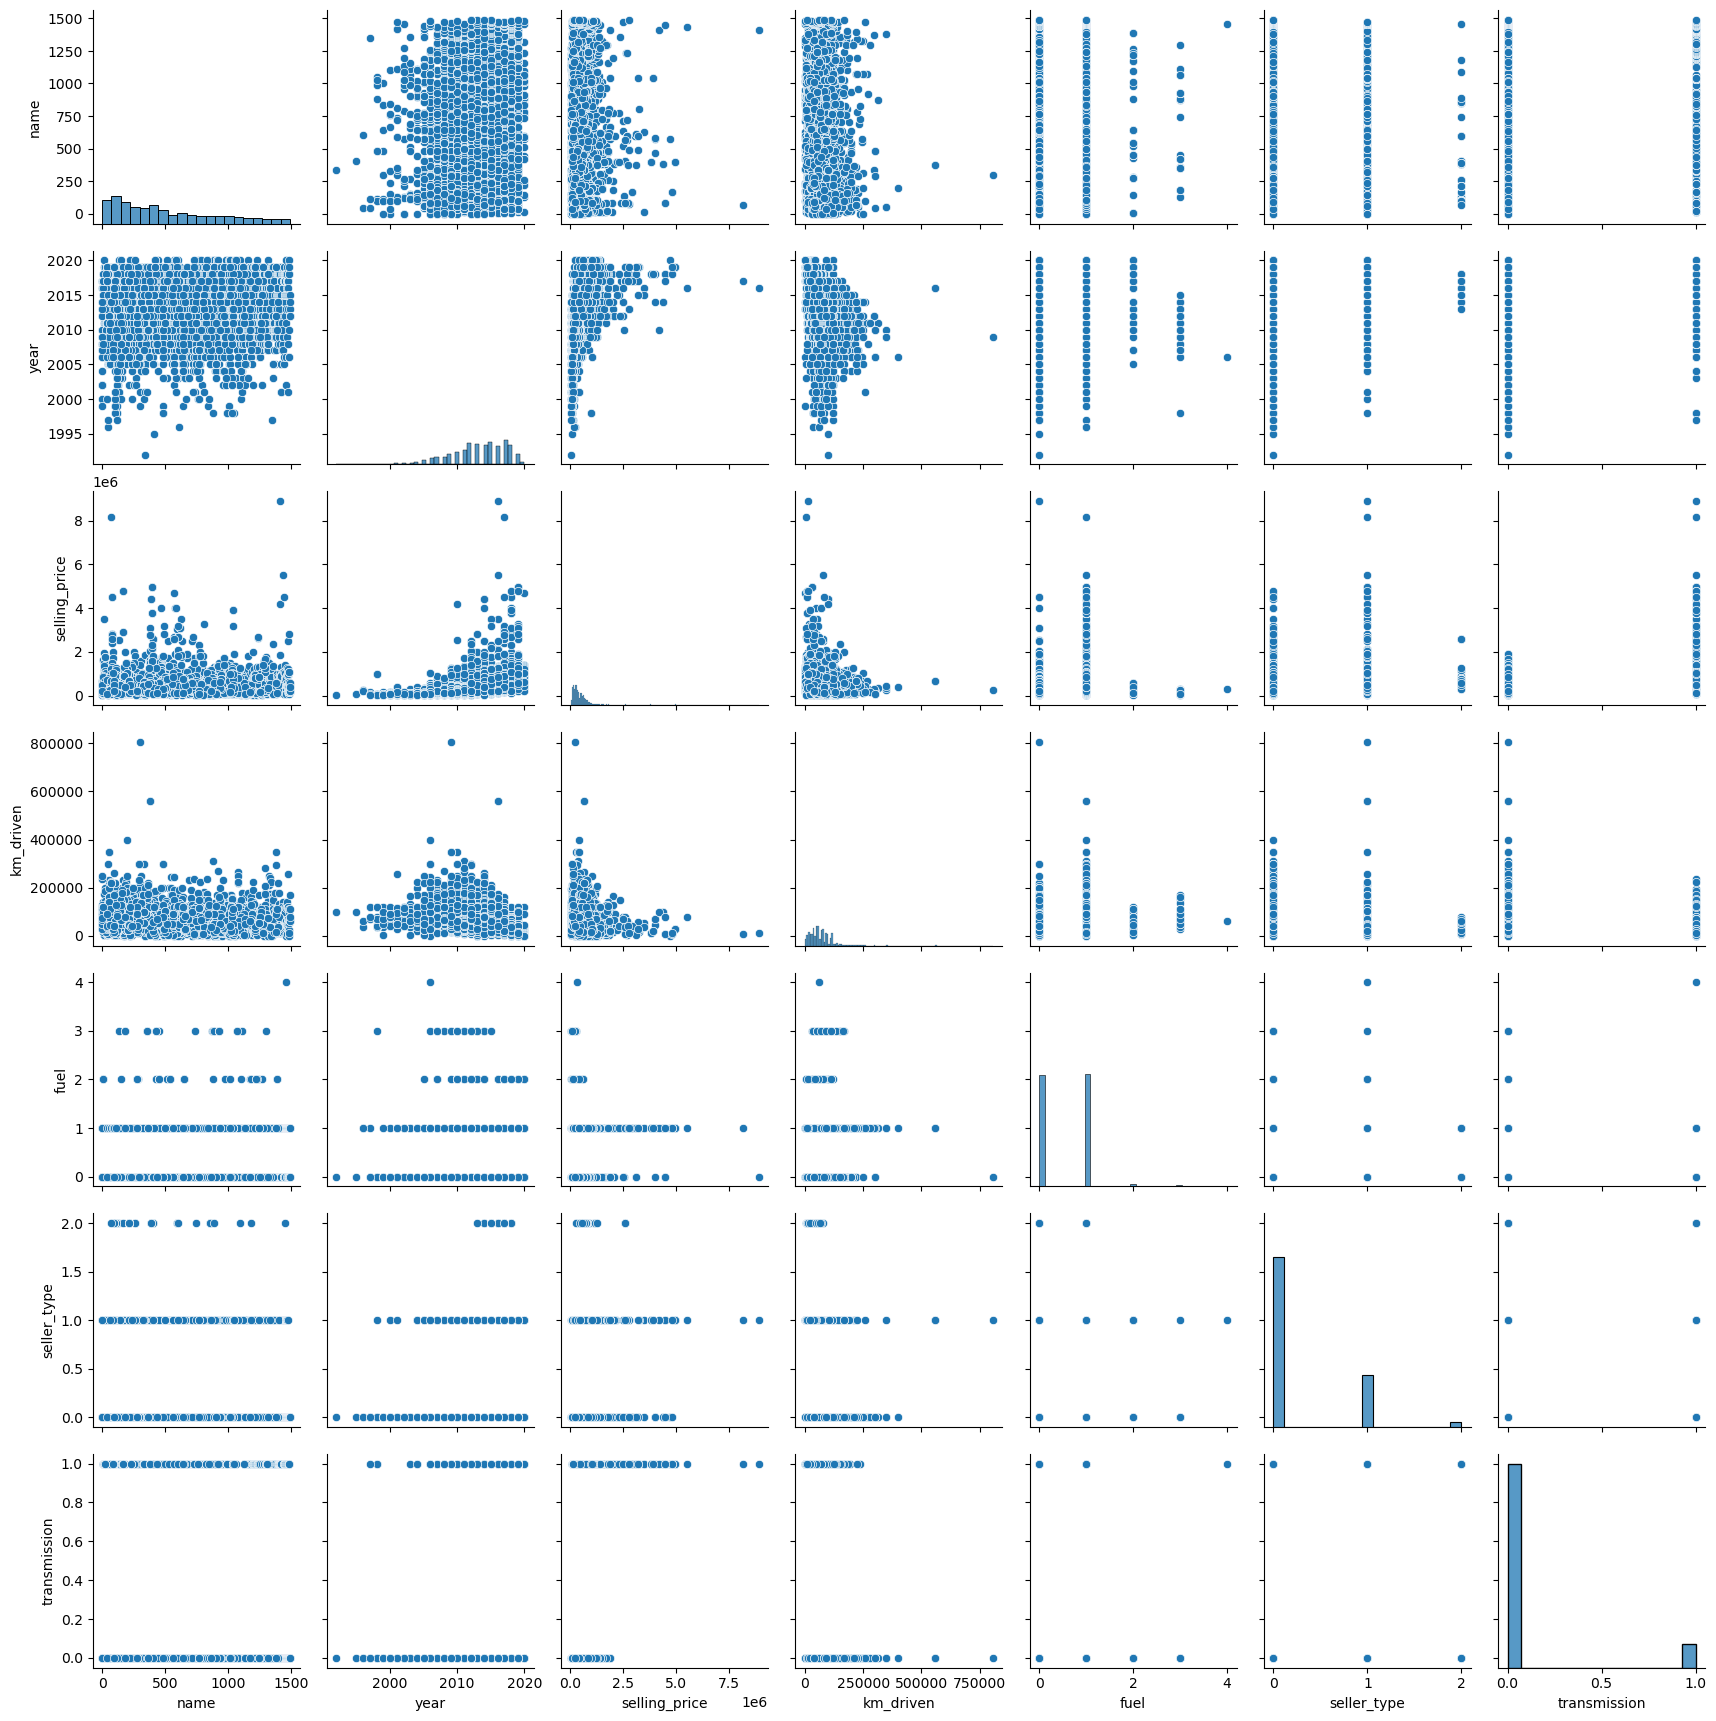

In [23]:
import seaborn as sns
sns.pairplot(df[['name','year','selling_price','km_driven','fuel','seller_type','transmission']])


In [24]:
# Function to scatter plot with regression line
def plot_scatter_with_regression(ax,x_data,y_data,x_label,y_label,title):
    ax.scatter(x_data,y_data,alpha=0.5)

    # Calculate regression line
    slope, intercept = np.polyfit(x_data,y_data,1)
    regression_line = slope*x_data + intercept

    ax.plot(x_data,regression_line, color='red', label='Regression_Line')

    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend()



KeyError: 'Ambience'

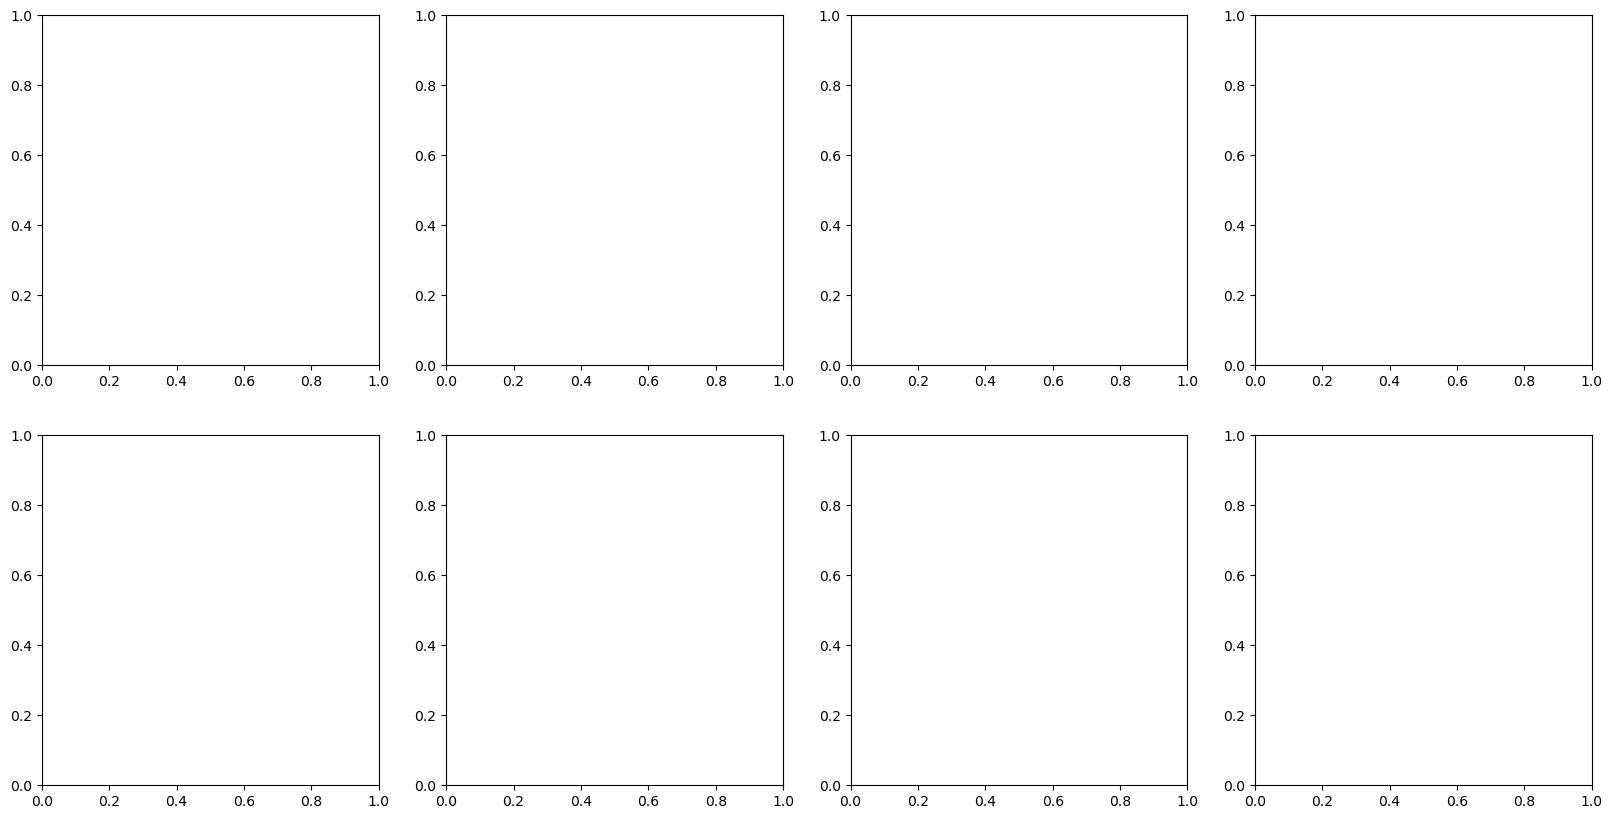

In [25]:
fig , ax = plt.subplots(2,4, figsize=(20,10))

# Scatter plot for TV vs Sales
plot_scatter_with_regression(ax[0],df['Ambience'],df['Performance'],'Ambience','Performance','Ambience vs Performance')
plot_scatter_with_regression(ax[1],df['Customer_service'],df['Performance'],'Customer_service','Performance','Customer_service vs Performance')
plot_scatter_with_regression(ax[2],df['Offers'],df['Performance'],'Offers','Performance','Offers vs Performance')
plot_scatter_with_regression(ax[3],df['Product_range'],df['Performance'],'Product_range','Performance','Product_range vs Performance')
plt.tight_layout
plt.show()

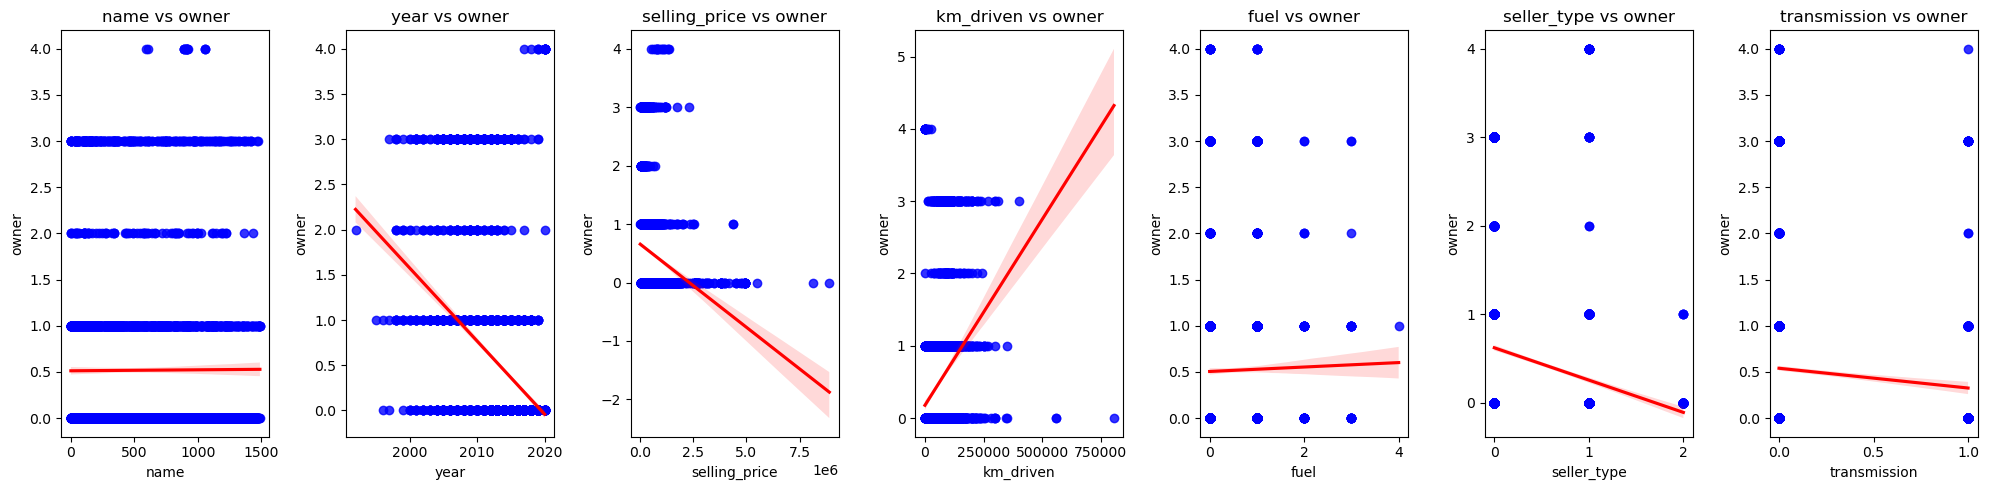

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your dataframe and has the necessary columns
columns_to_plot = ['name','year','selling_price','km_driven','fuel','seller_type','transmission']

# Create subplots
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(20, 5))  # Adjust the layout

# Loop through each column and create scatter plots with regression lines
for i, column in enumerate(columns_to_plot):
    sns.regplot(
        ax=axes[i], 
        x=df[column], 
        y=df['owner'], 
        scatter_kws={'color': 'blue'}, 
        line_kws={'color': 'red'}
    )
    axes[i].set_title(f'{column} vs owner')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('owner')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
